In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
time_series = pd.read_csv("/home/olga/Projects/CPI/dataset/CI_2015_2018.csv", header = None)
# time_series = time_series[25:]
time_series.head()

,0,1
0,0,137.9
1,1,140.1
2,2,142.8
3,3,142.4
4,4,143.8


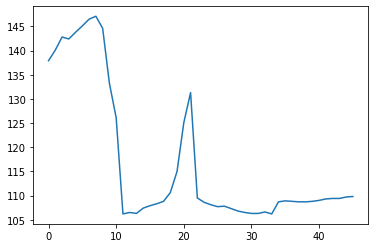

In [19]:
plt.plot(time_series[0], time_series[1])
plt.show()

In [43]:
def statistics(x):
    rolmean = x.rolling(window=6, center=False).mean()
    rolstd = x.rolling(window=2, center=False).std() 
    
    # Plot rolling statistics
    orig = plt.plot(x[1], color='blue', label='Original') 
    mean = plt.plot(rolmean[1], color='red', label='Rolling Mean') 
    std = plt.plot(rolstd[1], color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

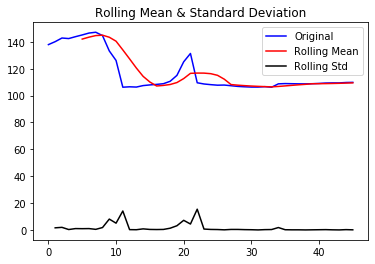

In [44]:
statistics(time_series)

In [21]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(time_series)

adf

ValueError: too many values to unpack (expected 2)

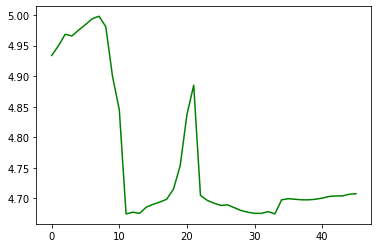

In [39]:
time_series_log = np.log1p(time_series)
time_series_log[0] = time_series[0]
plt.plot(time_series_log[0], time_series_log[1], color="green")
plt.show()

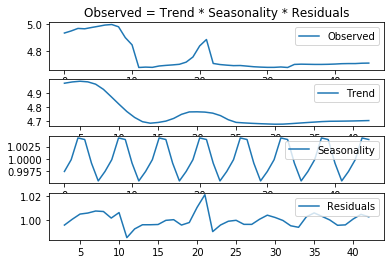

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
period = 6
decomposition = seasonal_decompose(time_series_log[1], model='multiplicative', freq=period)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.title('Observed = Trend * Seasonality * Residuals')
plt.plot(time_series_log[0], time_series_log[1], label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper right')

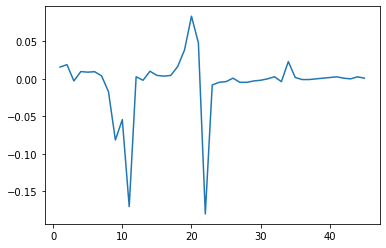

In [41]:
time_series_log_diff = time_series_log - time_series_log.shift()
plt.plot(time_series_log[0], time_series_log_diff[1])
plt.show()

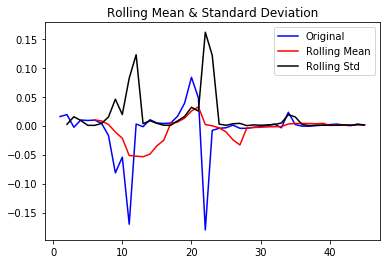

In [45]:
statistics(time_series_log_diff)

## ARIMA

In [46]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.arima_model import ARIMA
import itertools

#### Partial autocorrelation

In [53]:
ts = time_series[1].to_numpy().reshape((time_series.shape[0], 1))
ts_diff = ts[]

#### Parameter grid search

In [52]:
p = d = q = range(13)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], period) for x in pdq]